<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Missing Values**


Estimated time needed: **30** minutes


Data wrangling is the process of cleaning, transforming, and organizing data to make it suitable for analysis. Finding and handling missing values is a crucial step in this process to ensure data accuracy and completeness. In this lab, you will focus exclusively on identifying and handling missing values in the dataset.


## Objectives


After completing this lab, you will be able to:


-   Identify missing values in the dataset.

- Quantify missing values for specific columns.

- Impute missing values using various strategies.


## Hands on Lab


##### Setup: Install Required Libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

##### Import Necessary Modules:


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Tasks


<h2>1. Load the Dataset</h2>
<p>
We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:



In [3]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### 2. Explore the Dataset
##### Task 1: Display basic information and summary statistics of the dataset.


In [4]:
df.describe(include='all')

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
count,65457.000000,65457,65457,65457,54820,65457,54480,60803,60507,49251,...,29456.000000,29454.000000,29462.000000,29462.000000,29456.000000,29451.000000,56198,56255,2.343700e+04,29131.000000
unique,NaN,5,8,110,3,1,118,8,418,10853,...,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN
top,NaN,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
freq,NaN,50219,23913,39051,23018,65457,9995,24947,3676,603,...,NaN,NaN,NaN,NaN,NaN,NaN,38778,30081,NaN,NaN
mean,32714.493591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.339971,22.964277,20.279127,16.167837,10.953481,9.953618,NaN,NaN,8.615893e+04,6.934915
std,18892.431636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.088870,27.017634,26.110706,24.844177,22.904463,21.775070,NaN,NaN,1.867532e+05,2.088356
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1.000000e+00,0.000000
25%,16354.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,3.271200e+04,6.000000
50%,32716.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.000000,15.000000,10.000000,5.000000,0.000000,0.000000,NaN,NaN,6.500000e+04,7.000000
75%,49076.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.000000,30.000000,25.000000,20.000000,10.000000,10.000000,NaN,NaN,1.080000e+05,8.000000


### 3. Finding Missing Values
##### Task 2: Identify missing values for all columns.


In [5]:
# Count missing values for each column
dict_missing_values = df.isnull().sum().to_dict()

# Print the dictionary
print("Missing values per column:")
print(dict_missing_values)

Missing values per column:
{'ResponseId': 0, 'MainBranch': 0, 'Age': 0, 'Employment': 0, 'RemoteWork': 10637, 'Check': 0, 'CodingActivities': 10977, 'EdLevel': 4654, 'LearnCode': 4950, 'LearnCodeOnline': 16206, 'TechDoc': 24550, 'YearsCode': 5570, 'YearsCodePro': 13834, 'DevType': 5994, 'OrgSize': 17969, 'PurchaseInfluence': 18043, 'BuyNewTool': 20269, 'BuildvsBuy': 22091, 'TechEndorse': 21782, 'Country': 6508, 'Currency': 18765, 'CompTotal': 31713, 'LanguageHaveWorkedWith': 5694, 'LanguageWantToWorkWith': 9688, 'LanguageAdmired': 14569, 'DatabaseHaveWorkedWith': 15188, 'DatabaseWantToWorkWith': 22886, 'DatabaseAdmired': 26887, 'PlatformHaveWorkedWith': 23079, 'PlatformWantToWorkWith': 30914, 'PlatformAdmired': 34069, 'WebframeHaveWorkedWith': 20286, 'WebframeWantToWorkWith': 26913, 'WebframeAdmired': 30505, 'EmbeddedHaveWorkedWith': 43236, 'EmbeddedWantToWorkWith': 47851, 'EmbeddedAdmired': 48718, 'MiscTechHaveWorkedWith': 26007, 'MiscTechWantToWorkWith': 32488, 'MiscTechAdmired': 358

##### Task 3: Visualize missing values using a heatmap (Using seaborn library).



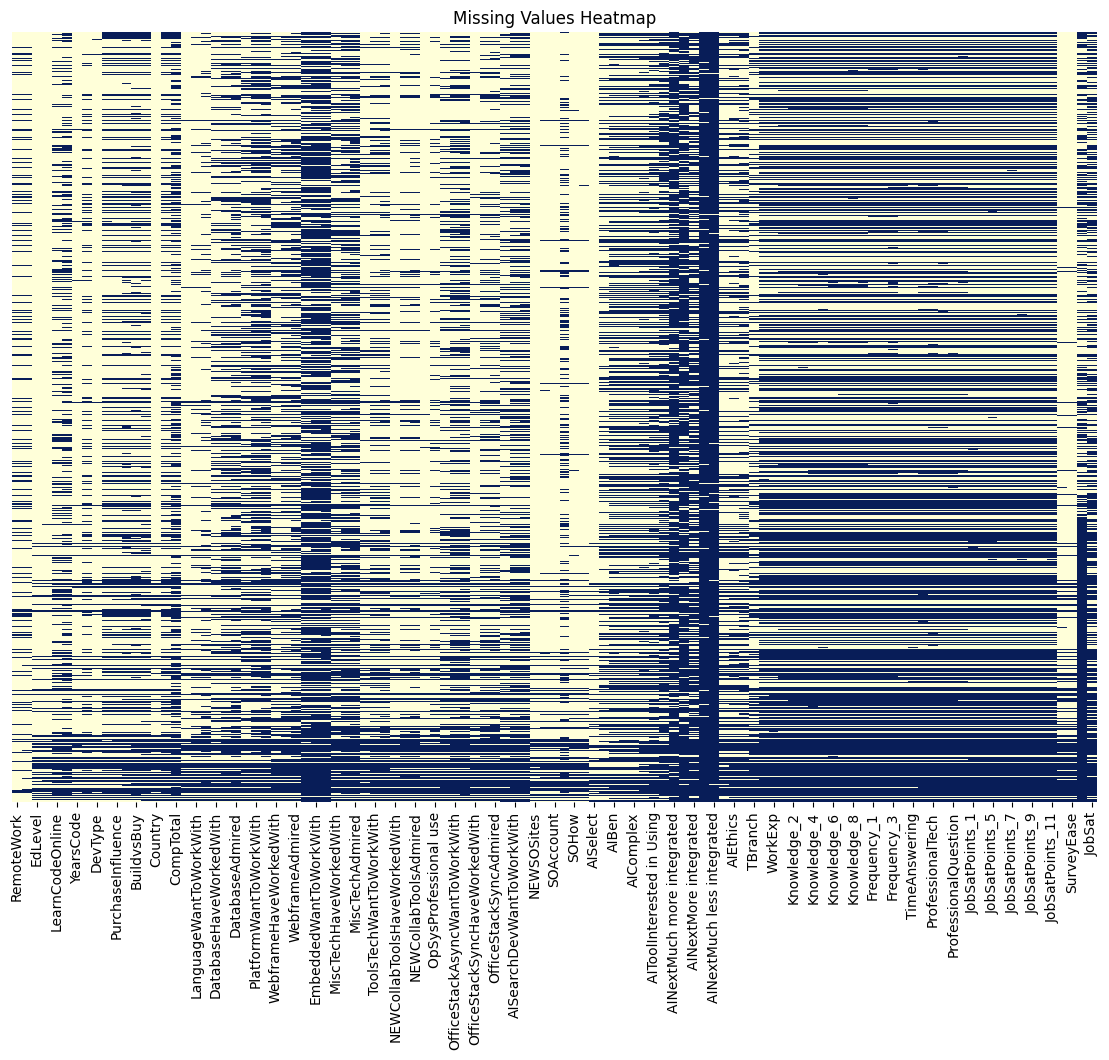

In [6]:
#Only columns with null values (with all missing the heatmap does not look good)
columns_with_missing = df.columns[df.isnull().any()]
#Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df[columns_with_missing].isnull(), cbar=False, cmap="YlGnBu", yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

##### Task 4: Count the number of missing rows for a specific column (e.g., `Employment`).


In [7]:
# Count missing rows 
missing_rows = df[df.isnull().any(axis=1)]
print(missing_rows)

       ResponseId                                         MainBranch  \
0               1                     I am a developer by profession   
1               2                     I am a developer by profession   
2               3                     I am a developer by profession   
3               4                              I am learning to code   
4               5                     I am a developer by profession   
...           ...                                                ...   
65452       35588  I am not primarily a developer, but I write co...   
65453       50580                     I am a developer by profession   
65454        9938                     I am a developer by profession   
65455       40874                     I am a developer by profession   
65456       36796                     I am a developer by profession   

                      Age                                         Employment  \
0      Under 18 years old                              

### 4. Imputing Missing Values
##### Task 5: Identify the most frequent (majority) value in a specific column (e.g., `Employment`).


In [8]:
most_frequent_values = df[columns_with_missing].apply(lambda x: x.value_counts().idxmax())
for column, value in most_frequent_values.items():
    print(f'Most frequent value in "{column}": {value}')


Most frequent value in "RemoteWork": Hybrid (some remote, some in-person)
Most frequent value in "CodingActivities": Hobby
Most frequent value in "EdLevel": Bachelor’s degree (B.A., B.S., B.Eng., etc.)
Most frequent value in "LearnCode": Other online resources (e.g., videos, blogs, forum, online community)
Most frequent value in "LearnCodeOnline": Technical documentation;Blogs;Written Tutorials;Stack Overflow
Most frequent value in "TechDoc": API document(s) and/or SDK document(s);User guides or README files found in the source repository;Traditional public search engine
Most frequent value in "YearsCode": 10
Most frequent value in "YearsCodePro": 2
Most frequent value in "DevType": Developer, full-stack
Most frequent value in "OrgSize": 20 to 99 employees
Most frequent value in "PurchaseInfluence": I have some influence
Most frequent value in "BuyNewTool": Start a free trial;Ask developers I know/work with;Visit developer communities like Stack Overflow
Most frequent value in "Buildvs

##### Task 6: Impute missing values in the `Employment` column with the most frequent value.



In [11]:
df_imputed = df.copy()
for column, most_frequent_value in most_frequent_values.items():
    df_imputed[column] = df_imputed[column].fillna(most_frequent_value)

# Check for missing values in the new df
print(df_imputed[column].isnull().sum())
print(df[column].isnull().sum())

0
36326


### 5. Visualizing Imputed Data
##### Task 7: Visualize the distribution of a column after imputation (e.g., `Employment`).


/tmp/ipykernel_1396/1411151653.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=edlevel_counts.index, y=edlevel_counts.values, palette="Set2")


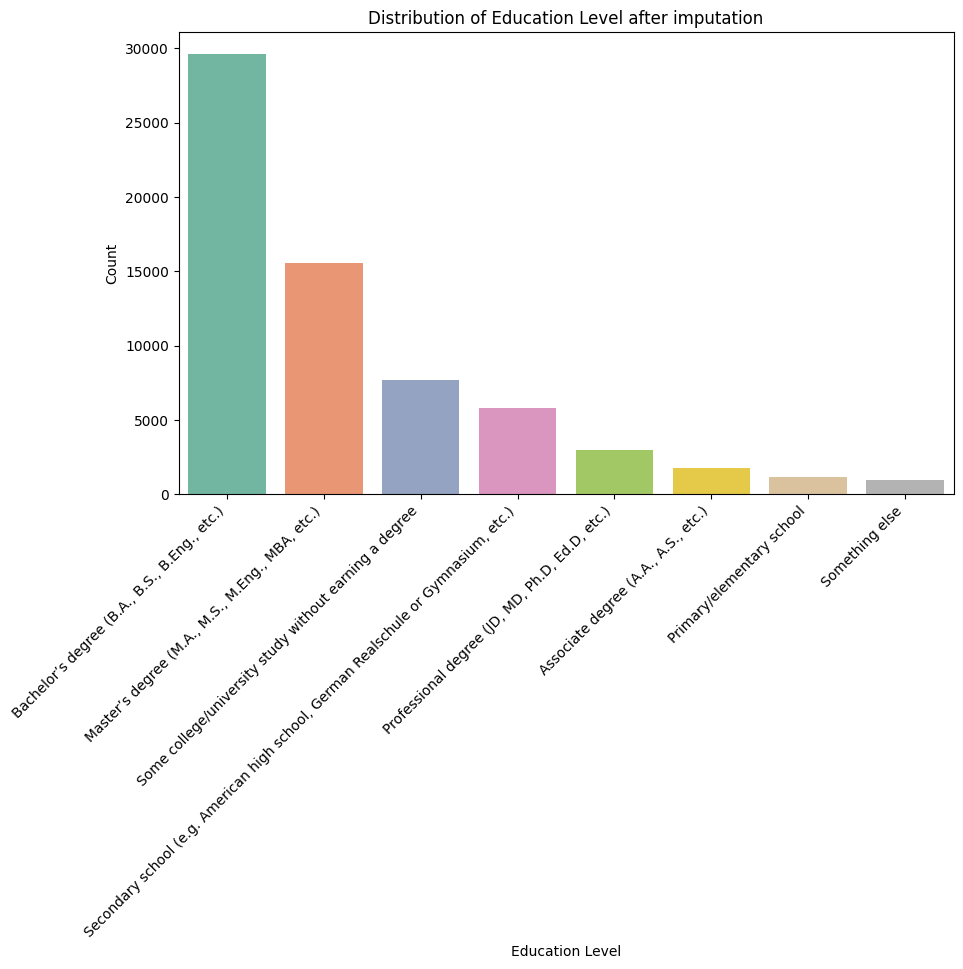

In [12]:
# Distribution of 'EdLevel'
edlevel_counts = df_imputed["EdLevel"].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=edlevel_counts.index, y=edlevel_counts.values, palette="Set2")
plt.title('Distribution of Education Level after imputation')
plt.xlabel('Education Level')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')
plt.show()

### Summary


In this lab, you:
- Loaded the dataset into a pandas DataFrame.
- Identified missing values across all columns.
- Quantified missing values in specific columns.
- Imputed missing values in a categorical column using the most frequent value.
- Visualized the imputed data for better understanding.
  


Copyright © IBM Corporation. All rights reserved.
